<a href="https://colab.research.google.com/github/shirish-baral/ai-lab/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab Assignment 2:**
Route Finder Using Bi-Directional BFS/DFS
Objective: Use Bi-directional BFS/DFS to solve a navigation problem.
Problem Statement: Represent a city map as a graph where intersections are nodes and roads are edges. Find the shortest path between two locations.

Tasks:
  Implement Bi-directional BFS to minimize the number of nodes explored.
- Compare the performance of Bi-directional BFS with standard BFS and DFS.
- Visualize the search process (e.g., using a library like networkx in Python).


---



Bi-directional BFS Path: ['A', 'C', 'D', 'F', 'H']
Standard BFS Path: ['A', 'B', 'D', 'F', 'H']
DFS Path: ['A', 'C', 'E', 'F', 'H']


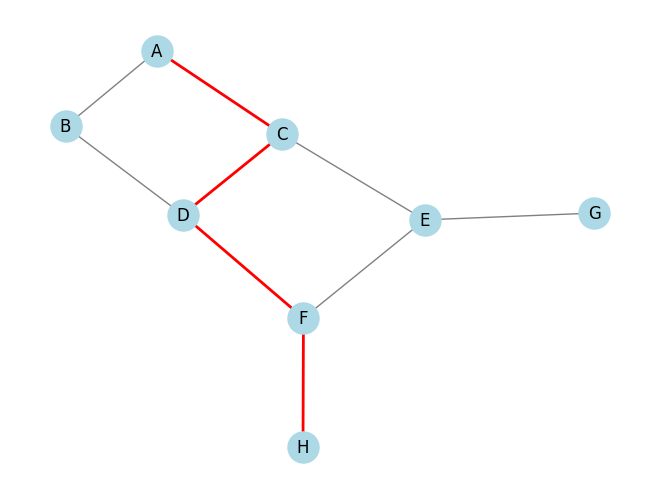

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def bidirectional_bfs(graph, start, goal):
    if start == goal:
        return [start]

    # Initialize the frontiers
    frontier_start = {start}
    frontier_goal = {goal}

    # Parent tracking
    parents_start = {start: None}
    parents_goal = {goal: None}

    while frontier_start and frontier_goal:
        # Expand the start frontier
        next_frontier = set()
        for node in frontier_start:
            for neighbor in graph[node]:
                if neighbor not in parents_start:
                    parents_start[neighbor] = node
                    next_frontier.add(neighbor)

                    if neighbor in frontier_goal:
                        return reconstruct_path(parents_start, parents_goal, neighbor)
        frontier_start = next_frontier

        # Expand the goal frontier
        next_frontier = set()
        for node in frontier_goal:
            for neighbor in graph[node]:
                if neighbor not in parents_goal:
                    parents_goal[neighbor] = node
                    next_frontier.add(neighbor)

                    if neighbor in frontier_start:
                        return reconstruct_path(parents_start, parents_goal, neighbor)
        frontier_goal = next_frontier

    return None

def reconstruct_path(parents_start, parents_goal, meeting_point):
    path_start = []
    path_goal = []

    # Build the path from start to meeting_point
    node = meeting_point
    while node is not None:
        path_start.append(node)
        node = parents_start[node]

    # Build the path from goal to meeting_point
    node = meeting_point
    while node is not None:
        path_goal.append(node)
        node = parents_goal[node]

    return path_start[::-1] + path_goal[1:]

def bfs(graph, start, goal):
    queue = deque([start])
    parents = {start: None}

    while queue:
        node = queue.popleft()

        if node == goal:
            path = []
            while node is not None:
                path.append(node)
                node = parents[node]
            return path[::-1]

        for neighbor in graph[node]:
            if neighbor not in parents:
                parents[neighbor] = node
                queue.append(neighbor)

    return None

def dfs(graph, start, goal):
    stack = [start]
    parents = {start: None}

    while stack:
        node = stack.pop()

        if node == goal:
            path = []
            while node is not None:
                path.append(node)
                node = parents[node]
            return path[::-1]

        for neighbor in graph[node]:
            if neighbor not in parents:
                parents[neighbor] = node
                stack.append(neighbor)

    return None

def visualize_graph(graph, path=None):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')

    if path:
        edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        nx.draw_networkx_edges(graph, pos, edgelist=edges, edge_color='red', width=2)

    plt.show()

if __name__ == "__main__":
    # Define the graph
    city_map = nx.Graph()
    edges = [
        ("A", "B"), ("A", "C"), ("B", "D"), ("C", "D"),
        ("C", "E"), ("D", "F"), ("E", "F"), ("E", "G"), ("F", "H")
    ]
    city_map.add_edges_from(edges)

    graph = nx.to_dict_of_lists(city_map)

    # Start and goal nodes
    start, goal = "A", "H"

    # Perform searches
    path_bidirectional = bidirectional_bfs(graph, start, goal)
    path_bfs = bfs(graph, start, goal)
    path_dfs = dfs(graph, start, goal)

    # Print and visualize results
    print("Bi-directional BFS Path:", path_bidirectional)
    print("Standard BFS Path:", path_bfs)
    print("DFS Path:", path_dfs)

    visualize_graph(city_map, path_bidirectional)
